In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


In [2]:
pwd

'/home/maxloo/src/tf-keras/TF_2_Notebooks_and_Data/04-CNNs'

In [3]:
my_data_dir = '/home/maxloo/src/tf-keras/TF_2_Notebooks_and_Data/DATA/cell_images'

In [4]:
os.listdir(my_data_dir)

['train', 'test']

In [5]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [6]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path+'/parasitized')[0]

'C137P98ThinF_IMG_20151005_155444_cell_89.png:Zone.Identifier'

In [9]:
para_cell = train_path+'/parasitized'+'/C137P98ThinF_IMG_20151005_155444_cell_89.png'

In [10]:
para_img= imread(para_cell)

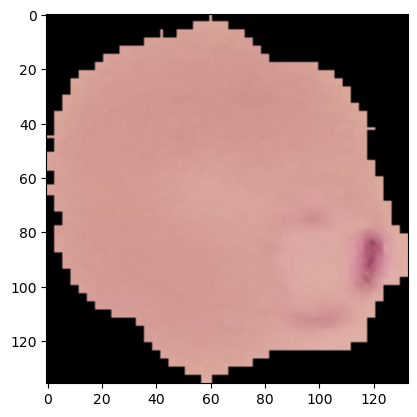

In [11]:
plt.imshow(para_img)

In [12]:
para_img.shape

(136, 133, 3)

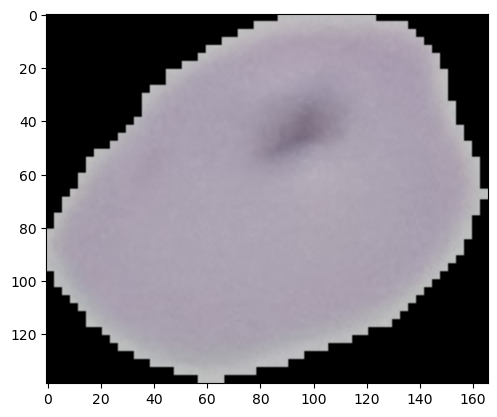

In [16]:
uninfected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'/uninfected')[0][:-16]
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell)

In [17]:
len(os.listdir(train_path+'/parasitized'))

24960

In [18]:
len(os.listdir(train_path+'/uninfected'))

24960

In [19]:
len(os.listdir(test_path+'/parasitized'))

2600

In [20]:
len(os.listdir(test_path+'/uninfected'))

2600

In [21]:
uninfected_cell.shape

(139, 166, 3)

In [32]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/uninfected'):
    image_path = os.path.join(test_path, 'uninfected', image_filename.split(':Zone.Identifier')[0])
    img = imread(image_path)
#     img = imread(test_path+'uninfected'+'/'+(image_filename))
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

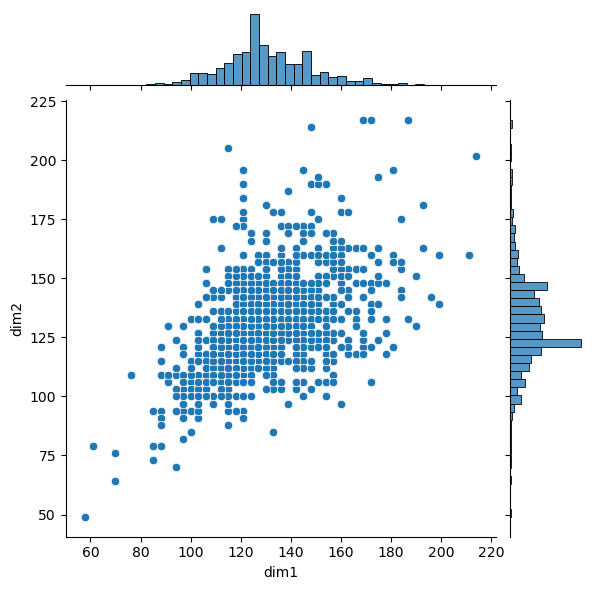

In [34]:
data = pd.DataFrame({'dim1': dim1, 'dim2': dim2})
# Use jointplot with the DataFrame
sns.jointplot(x='dim1', y='dim2', data=data)

In [35]:
np.mean(dim1)

130.92538461538462

In [36]:
np.mean(dim2)

130.75

In [37]:
image_shape = (130,130,3)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )


2023-11-16 01:48:46.728738: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-16 01:48:46.964231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 01:48:47.695790: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [39]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [40]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [42]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2023-11-16 01:54:39.043570: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-16 01:54:39.103014: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [50]:
batch_size = 64

In [51]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [52]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [47]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
390/390 [==============================] - 69s 177ms/step - loss: 0.1716 - accuracy: 0.9471 - val_loss: 0.1641 - val_accuracy: 0.9458
Epoch 2/20
390/390 [==============================] - 76s 194ms/step - loss: 0.1610 - accuracy: 0.9496 - val_loss: 0.1546 - val_accuracy: 0.9465
Epoch 3/20
390/390 [==============================] - 76s 195ms/step - loss: 0.1526 - accuracy: 0.9504 - val_loss: 0.1554 - val_accuracy: 0.9473
Epoch 4/20
390/390 [==============================] - 74s 190ms/step - loss: 0.1510 - accuracy: 0.9517 - val_loss: 0.1557 - val_accuracy: 0.9469
Epoch 5/20
390/390 [==============================] - 74s 190ms/step - loss: 0.1481 - accuracy: 0.9518 - val_loss: 0.1465 - val_accuracy: 0.9488
Epoch 6/20
390/390 [==============================] - 74s 190ms/step - loss: 0.1464 - accuracy: 0.9521 - val_loss: 0.1513 - val_accuracy: 0.9485
Epoch 7/20
390/390 [==============================] - 74s 189ms/step - loss: 0.1462 - accuracy: 0.9530 - val_loss: 0.1464 - val_ac

In [54]:
from tensorflow.keras.models import load_model
model.save('malaria_detector_TEST.h5')

<Axes: >

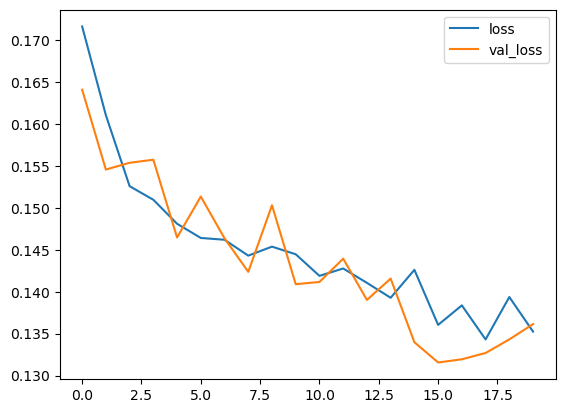

In [55]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [56]:
model.metrics_names

['loss', 'accuracy']

In [57]:
model.evaluate_generator(test_image_gen)

[0.13483786582946777, 0.9538461565971375]

In [58]:
from tensorflow.keras.preprocessing import image

In [59]:
pred_probabilities = model.predict_generator(test_image_gen)

In [60]:
pred_probabilities

array([[1.9286163e-03],
       [7.7495133e-06],
       [1.6983661e-04],
       ...,
       [9.9449944e-01],
       [9.9356812e-01],
       [9.8044705e-01]], dtype=float32)

In [61]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [62]:
predictions = pred_probabilities > 0.5

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [64]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [65]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1226,   74],
       [  58, 1242]])

In [66]:
para_cell

'/home/maxloo/src/tf-keras/TF_2_Notebooks_and_Data/DATA/cell_images/train//parasitized/C137P98ThinF_IMG_20151005_155444_cell_89.png'

In [67]:
my_image = image.load_img(para_cell,target_size=image_shape)

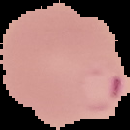

In [68]:
my_image

In [69]:
type(my_image)

PIL.Image.Image

In [70]:
my_image = image.img_to_array(my_image)
type(my_image)

numpy.ndarray

In [71]:
my_image.shape

(130, 130, 3)

In [72]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 130, 130, 3)

In [73]:
model.predict(my_image)

1/1 [==============================] - 0s 53ms/step


array([[0.]], dtype=float32)